# 7506 - Organizacion de Datos - Finger 1

### Autor: Claudio Collado (Oyente de la Materia)

### Analisis del Dataset `train`

# 1. Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importo el Dataset

In [2]:
df_train = pd.read_csv("train.csv")

# 3. Caracteristicas Generales 

In [3]:
#Dimension del DataFrame

df_train.shape

(7613, 5)

In [4]:
#Tamaño del DataFrame (n° filas x n°columnas)

df_train.size

38065

In [5]:
#Observo las 5 primeras filas

df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
#Observo las 5 ultimas filas

df_train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [7]:
#Resumen del DataFrame

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# 4. Analisis de Columna `text`

La columna `text` corresponde a *the text of the tweet* 

In [9]:
#Observo los 5 primeros valores de la columna que estoy analizando

col = df_train["text"]
col.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [10]:
#Creo una nueva columna en el DataFrame donde agrego la longitud del tuit

df_train['longitud'] = df_train["text"].str.len()

In [37]:
#Me quedo con la porcion del DataFrame donde el Target es igual a 0

sub_df_0 = df_train[df_train['target'] == 0]
sub_df_0.head()

,id,keyword,location,text,target,longitud
15,23,NaN,NaN,What's up man?,0,14
16,24,NaN,NaN,I love fruits,0,13
17,25,NaN,NaN,Summer is lovely,0,16
18,26,NaN,NaN,My car is so fast,0,17
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,28


In [39]:
#Me quedo con la porcion del DataFrame donde el Target es igual a 1

sub_df_1 = df_train[df_train['target'] == 1]
sub_df_1.head()

,id,keyword,location,text,target,longitud
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [31]:
#Obtengo los estadisticos de Target 0

target_0 = sub_df_0['longitud'].describe()

In [32]:
#Obtengo los estadisticos de Target 1

target_1 = sub_df_1['longitud'].describe()

In [35]:
#Genero un nuevo DataFrame que contenga los dos resumenes estadisticos calculados anteriormente

resumen_estadisticos = pd.DataFrame({'Target 0': target_0,'Target 1':target_1})
resumen_estadisticos

,Target 0,Target 1
count,4342.000000,3271.000000
mean,95.706817,108.113421
std,35.885924,29.309854
min,7.000000,14.000000
25%,68.000000,88.000000
50%,101.000000,115.000000
75%,130.000000,136.000000
max,157.000000,151.000000


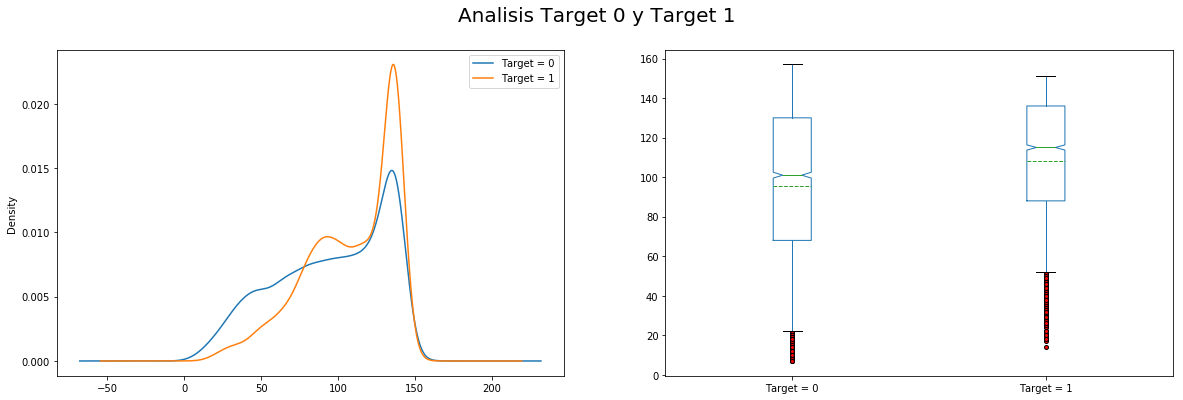

In [36]:
#Grafico las distribuciones para Target 0 y 1 - Graficos KDE y Boxplot en una sola Figura

datos = pd.DataFrame({'Target = 0':sub_df_0['longitud'],'Target = 1':sub_df_1['longitud']})
outliers = dict(marker='o', markerfacecolor='red', markersize=4,
                  linestyle='none')

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
fig.suptitle('Analisis Target 0 y Target 1',fontsize=20)
datos.plot.kde(ax=ax1)
datos.plot.box(ax=ax2,notch=True,flierprops=outliers, whis=0.75,meanline=True,showmeans=True,showfliers=True)
plt.show()